In [7]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


/Users/mac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import pandas as pd 
emotions = ['Anger','Contempt','Disgust','Fear','Happy','Neutral','Sad','Surprised']
df = pd.read_csv('archive/emotions.csv')

In [19]:
def verify(img1_path,img2_path):
    img1= cv2.imread(img1_path)
    img2= cv2.imread(img2_path)
    
    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
    output = DeepFace.verify(img1_path,img2_path,'Facenet')
    print(output)
    verification = output['verified']
    if verification:
       print('They are same')
    else:
       print('The are not same')

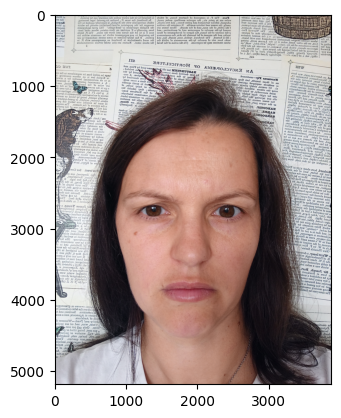

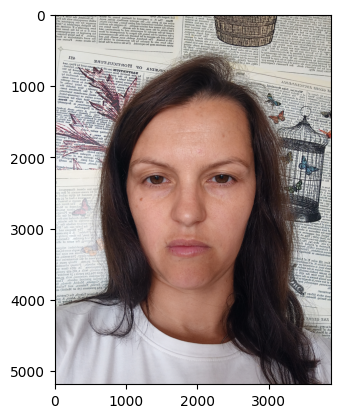

24-03-13 12:56:36 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /Users/mac/.deepface/weights/facenet_weights.h5
100%|██████████████████████████████████████| 92.2M/92.2M [00:09<00:00, 9.51MB/s]


{'verified': True, 'distance': 0.13682745805773977, 'threshold': 0.4, 'model': 'Facenet', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 637, 'y': 1840, 'w': 2504, 'h': 2504, 'left_eye': (696, 925), 'right_eye': (1754, 925)}, 'img2': {'x': 748, 'y': 1483, 'w': 2251, 'h': 2251, 'left_eye': (633, 847), 'right_eye': (1573, 831)}}, 'time': 26.34}
They are same


In [20]:
num = 0
path1 = f'archive/images/{num}/Anger.jpg' 
path2 = f'archive/images/{num}/Contempt.jpg' 

verify(path1,path2)

24-03-13 13:07:36 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.


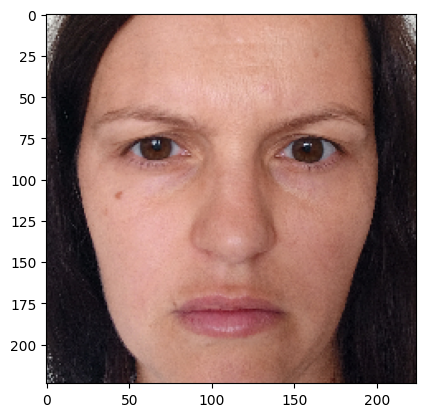

In [25]:
# find face
backends = ['opencv','ssd','dlib','mtcnn','retinaface','midiapipe']
face= DeepFace.detectFace(f'archive/images/0/Anger.jpg',target_size=(224,224))
plt.imshow(face)

In [26]:
# emotion,age,gender,race
result = DeepFace.analyze(f'archive/images/0/Anger.jpg','emotion','Facenet')
df = pd.DataFrame(result[0]['emotion'],index=[0])
indexs = df.columns.tolist()
nums = df.T[0].tolist()
plt.bar(indexs,nums)
result

In [28]:
result

[{'emotion': {'angry': 36.36306822299957,
   'disgust': 4.015257582068443,
   'fear': 38.67336809635162,
   'happy': 0.2548208925873041,
   'sad': 13.901405036449432,
   'surprise': 0.0996145885437727,
   'neutral': 6.69245719909668},
  'dominant_emotion': 'fear',
  'region': {'x': 637,
   'y': 1840,
   'w': 2504,
   'h': 2504,
   'left_eye': (696, 925),
   'right_eye': (1754, 925)},
  'face_confidence': 0.9}]

In [12]:
def show_image(num):
    path = f'archive/images/{num}/Anger.jpg'
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()